In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.8.0


In [3]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15420435068622343358
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14465892352
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 1785997107113306667
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [4]:
!apt-get install -y -qq protobuf-compiler python-pil python-lxml
!pip install --user Cython
!pip install --user contextlib2
!pip install --user jupyter
!pip install --user matplotlib

Selecting previously unselected package python-bs4.
(Reading database ... 155455 files and directories currently installed.)
Preparing to unpack .../0-python-bs4_4.6.0-1_all.deb ...
Unpacking python-bs4 (4.6.0-1) ...
Selecting previously unselected package python-pkg-resources.
Preparing to unpack .../1-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-chardet.
Preparing to unpack .../2-python-chardet_3.0.4-1_all.deb ...
Unpacking python-chardet (3.0.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../3-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-webencodings.
Preparing to unpack .../4-python-webencodings_0.5-2_all.deb ...
Unpacking python-webencodings (0.5-2) ...
Selecting previously unselected package python-html5lib.
Preparing to unpack .../5-python-html5lib_0.999999999-1_all.deb ...
Unpacking pyt

In [5]:
!pip install tf_slim
!pip install tensorflow_io

     |████████████████████████████████| 352 kB 30.0 MB/s 
     |████████████████████████████████| 23.4 MB 1.4 MB/s 


In [6]:
!git clone --quiet https://github.com/tensorflow/models.git

In [7]:
!ls

models	sample_data


In [8]:
import os
os.chdir('models/research')

In [9]:
!ls

adversarial_text    deeplab		   marco	     seq_flow_lite
attention_ocr	    deep_speech		   nst_blogpost      slim
audioset	    delf		   object_detection  vid2depth
autoaugment	    efficient-hrl	   pcl_rl
cognitive_planning  lfads		   README.md
cvt_text	    lstm_object_detection  rebar


In [10]:
!protoc object_detection/protos/*.proto --python_out=.

In [11]:
import sys
sys.path.append('/content/models/research/slim')

In [12]:
!ls

adversarial_text    deeplab		   marco	     seq_flow_lite
attention_ocr	    deep_speech		   nst_blogpost      slim
audioset	    delf		   object_detection  vid2depth
autoaugment	    efficient-hrl	   pcl_rl
cognitive_planning  lfads		   README.md
cvt_text	    lstm_object_detection  rebar


In [ ]:
%run object_detection/builders/model_builder_test.py

In [13]:
os.chdir('./object_detection')

In [14]:
!ls

anchor_generators			 inference
box_coders				 __init__.py
builders				 inputs.py
colab_tutorials				 inputs_test.py
configs					 legacy
CONTRIBUTING.md				 matchers
core					 meta_architectures
data					 metrics
data_decoders				 model_hparams.py
dataset_tools				 model_lib.py
dockerfiles				 model_lib_tf1_test.py
eval_util.py				 model_lib_tf2_test.py
eval_util_test.py			 model_lib_v2.py
exporter_lib_tf2_test.py		 model_main.py
exporter_lib_v2.py			 model_main_tf2.py
exporter_main_v2.py			 models
exporter.py				 model_tpu_main.py
exporter_tf1_test.py			 packages
export_inference_graph.py		 predictors
export_tflite_graph_lib_tf2.py		 protos
export_tflite_graph_lib_tf2_test.py	 README.md
export_tflite_graph_tf2.py		 samples
export_tflite_ssd_graph_lib.py		 test_data
export_tflite_ssd_graph_lib_tf1_test.py  test_images
export_tflite_ssd_graph.py		 tpu_exporters
g3doc					 utils


In [15]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.9.0'):
    raise ImportError('Please upgrade your TensorFlow installation to v1.9.* or later!')

In [16]:

# This is needed to display the images.
%matplotlib inline

In [17]:
from utils import label_map_util
from utils import visualization_utils as vis_util

In [18]:
!ls

anchor_generators			 __init__.py
box_coders				 inputs.py
builders				 inputs_test.py
colab_tutorials				 legacy
configs					 matchers
CONTRIBUTING.md				 meta_architectures
core					 metrics
data					 model_hparams.py
data_decoders				 model_lib.py
dataset_tools				 model_lib_tf1_test.py
dockerfiles				 model_lib_tf2_test.py
eval_util.py				 model_lib_v2.py
eval_util_test.py			 model_main.py
exporter_lib_tf2_test.py		 model_main_tf2.py
exporter_lib_v2.py			 models
exporter_main_v2.py			 model_tpu_main.py
exporter.py				 packages
exporter_tf1_test.py			 predictors
export_inference_graph.py		 protos
export_tflite_graph_lib_tf2.py		 __pycache__
export_tflite_graph_lib_tf2_test.py	 README.md
export_tflite_graph_tf2.py		 samples
export_tflite_ssd_graph_lib.py		 test_data
export_tflite_ssd_graph_lib_tf1_test.py  test_images
export_tflite_ssd_graph.py		 tpu_exporters
g3doc					 utils
inference


In [19]:
# What model to download.
MODEL_NAME = 'ssd_mobilenet_v1_coco_2018_01_28'
MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')

# http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_coco_2018_01_28.tar.gz

In [20]:
opener = urllib.request.URLopener()
opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)

tar_file = tarfile.open(MODEL_FILE)

for file in tar_file.getmembers():
    file_name = os.path.basename(file.name)
    if 'frozen_inference_graph.pb' in file_name:
        tar_file.extract(file, os.getcwd())

In [21]:
detection_graph = tf.Graph()

with detection_graph.as_default():
    od_graph_def = tf.compat.v1.GraphDef()
    with tf.compat.v2.io.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

In [22]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [23]:
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
# For the sake of simplicity we will use only 2 images:

# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = '/content/drive/MyDrive/Colab Notebooks/car_detection/content'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'test_{}.jpg'.format(i)) for i in range(1, 9) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

In [26]:
TEST_IMAGE_PATHS

['/content/drive/MyDrive/Colab Notebooks/car_detection/content/test_1.jpg',
 '/content/drive/MyDrive/Colab Notebooks/car_detection/content/test_2.jpg',
 '/content/drive/MyDrive/Colab Notebooks/car_detection/content/test_3.jpg',
 '/content/drive/MyDrive/Colab Notebooks/car_detection/content/test_4.jpg',
 '/content/drive/MyDrive/Colab Notebooks/car_detection/content/test_5.jpg',
 '/content/drive/MyDrive/Colab Notebooks/car_detection/content/test_6.jpg',
 '/content/drive/MyDrive/Colab Notebooks/car_detection/content/test_7.jpg',
 '/content/drive/MyDrive/Colab Notebooks/car_detection/content/test_8.jpg']

In [27]:
def run_inference_for_single_image(image, graph):
    
    with graph.as_default():
        with tf.compat.v1.Session() as sess:
            # Get handles to input and output tensors
            ops = tf.compat.v1.get_default_graph().get_operations()
            all_tensor_names = {output.name for op in ops for output in op.outputs}
            
            tensor_dict = {}
            for key in ['num_detections', 'detection_boxes', 'detection_scores',
                        'detection_classes', 'detection_masks']:
                tensor_name = key + ':0'
                if tensor_name in all_tensor_names:
                    tensor_dict[key] = tf.compat.v1.get_default_graph().get_tensor_by_name(tensor_name)
                    
            if 'detection_masks' in tensor_dict:
                # The following processing is only for single image
                detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
                detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
                # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
                real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
                detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
                detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
                detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                    detection_masks, detection_boxes, image.shape[0], image.shape[1])
                detection_masks_reframed = tf.cast(
                    tf.greater(detection_masks_reframed, 0.5), tf.uint8)
                # Follow the convention by adding back the batch dimension
                tensor_dict['detection_masks'] = tf.expand_dims(detection_masks_reframed, 0)
            
            image_tensor = tf.compat.v1.get_default_graph().get_tensor_by_name('image_tensor:0')

            # Run inference
            output_dict = sess.run(tensor_dict,
                                   feed_dict={image_tensor: np.expand_dims(image, 0)})

            # all outputs are float32 numpy arrays, so convert types as appropriate
            output_dict['num_detections'] = int(output_dict['num_detections'][0])
            output_dict['detection_classes'] = output_dict['detection_classes'][0].astype(np.uint8)
            output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
            output_dict['detection_scores'] = output_dict['detection_scores'][0]
            
            if 'detection_masks' in output_dict:
                output_dict['detection_masks'] = output_dict['detection_masks'][0]
            
    return output_dict

In [28]:

# This is needed to display the images.
%matplotlib inline

(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)


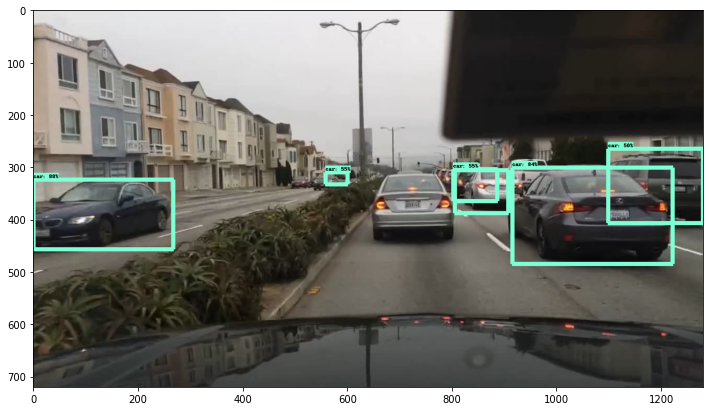

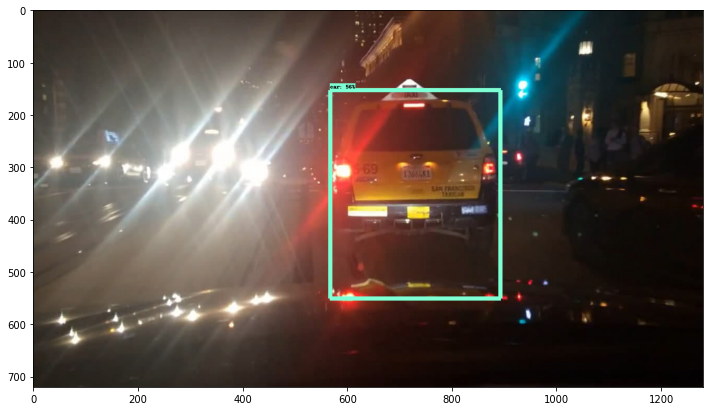

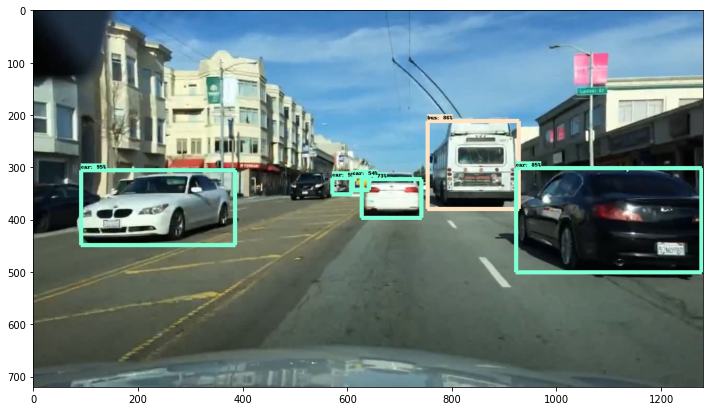

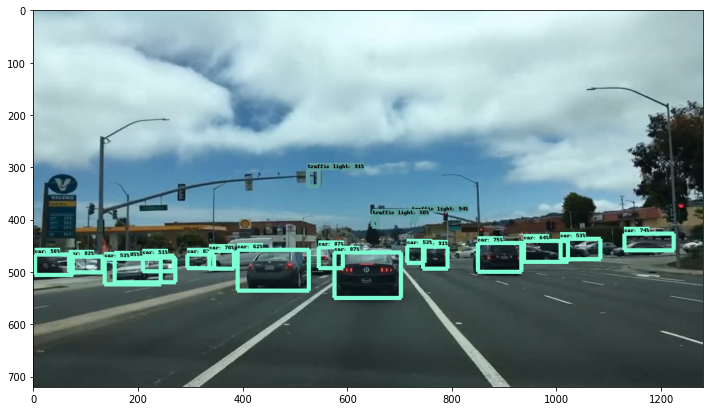

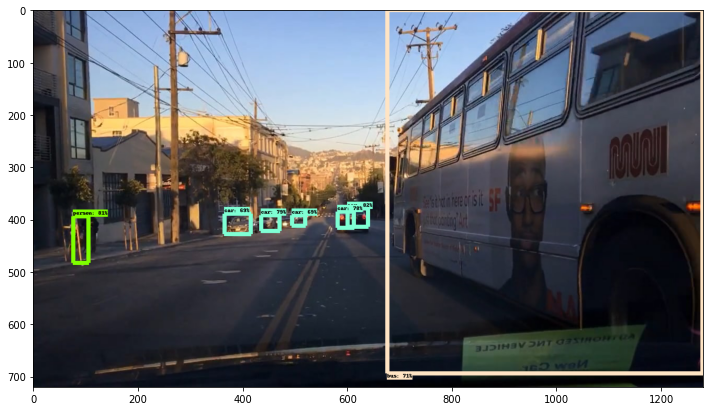

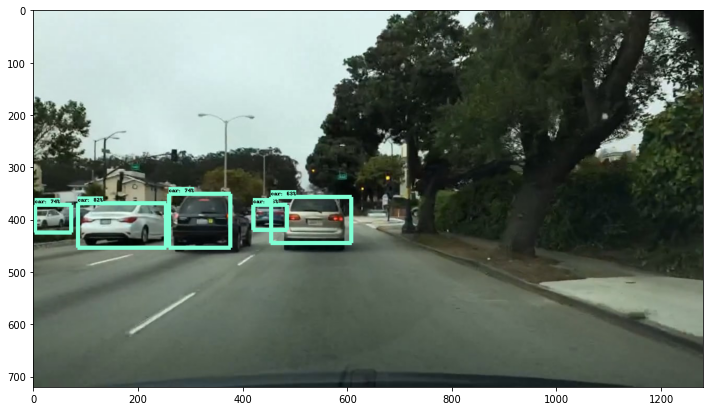

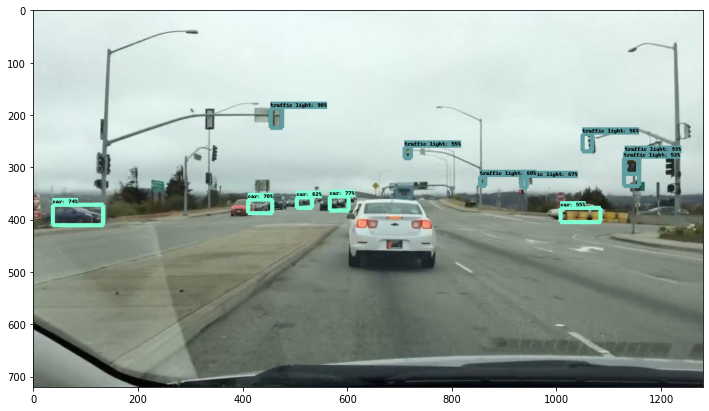

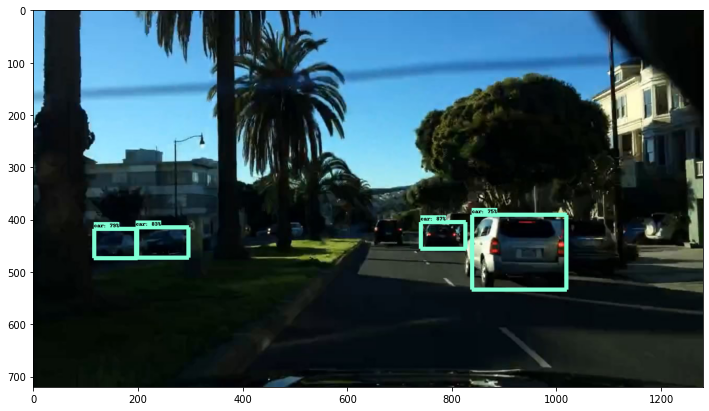

In [29]:
for image_path in TEST_IMAGE_PATHS:
    
    image = Image.open(image_path)
    # the array based representation of the image will be used later in order to prepare the
    # result image with boxes and labels on it.
    image_np = load_image_into_numpy_array(image)
    print(image_np.shape)
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    
    # Actual detection
    output_dict = run_inference_for_single_image(image_np, detection_graph)
    
    # Visualization of the results of a detection
    vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8)
    
    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image_np)